Keras CNN Model with Relu Activation and 0.6 Drop out


In [ ]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import copy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import LabelEncoder
import PIL
from PIL import Image
import random
from scipy import ndarray

# image processing library
import skimage as sk
from skimage import transform
from skimage import util
from skimage import io
from skimage.util import img_as_ubyte, img_as_float
from skimage.transform import warp, AffineTransform, ProjectiveTransform
from skimage.exposure import equalize_adapthist, equalize_hist, rescale_intensity, adjust_gamma, adjust_log, adjust_sigmoid
from skimage.filters import gaussian
from skimage.util import random_noise

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import h5py

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
# drive.mount('/content/drive/')
drive.mount('/content/drive/', force_remount=True) #DC updated
FI_dir = "/content/drive/MyDrive/Foot images3"

Mounted at /content/drive/


In [ ]:
print(os.listdir(FI_dir))

['SEVERE', 'HIGH ARCH', 'NORMAL ARCH', 'MILD', 'MODERATE', 'model_v2.json', 'model_v2.h5', 'model_v3.json', 'model_v3.h5']


In [ ]:
image=[]
labels=[]
for f in os.listdir(FI_dir):
  if f=='MILD':
    for c in os.listdir(os.path.join(FI_dir, f)):
      image.append(os.path.join(FI_dir, f,c))
      labels.append('MILD')
  if f=='SEVERE':
    for c in os.listdir(os.path.join(FI_dir, f)):
      image.append(os.path.join(FI_dir, f,c))
      labels.append('SEVERE')
  if f=='MODERATE':
    for c in os.listdir(os.path.join(FI_dir, f)):
      image.append(os.path.join(FI_dir, f,c))
      labels.append('MODERATE')
  if f=='HIGH ARCH':
      for c in os.listdir(os.path.join(FI_dir, f)):
        image.append(os.path.join(FI_dir, f,c))
        labels.append('HIGH ARCH')
  if f=='NORMAL ARCH':
      for c in os.listdir(os.path.join(FI_dir, f)):
        image.append(os.path.join(FI_dir, f,c))
        labels.append('NORMAL ARCH')
imagedata = {'Images':image, 'labels':labels} 
image_data = pd.DataFrame(imagedata) 

In [ ]:
#image_data.head()
image_data.groupby(['labels']).size()

labels
HIGH ARCH      2269
MILD           2312
MODERATE       2381
NORMAL ARCH    2347
SEVERE         2348
dtype: int64

In [ ]:
image_size = (500, 500)
batch_size = 20

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    FI_dir,
    validation_split=0.2,
    subset="training",
    seed=3333,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    FI_dir,
    validation_split=0.2,
    subset="validation",
    seed=3333,
    image_size=image_size,
    batch_size=batch_size,
)

Found 11657 files belonging to 5 classes.
Using 9326 files for training.
Found 11657 files belonging to 5 classes.
Using 2331 files for validation.


In [ ]:
train_ds

<BatchDataset shapes: ((None, 500, 500, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
#from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(500,500,3)))
model.add(MaxPool2D())
model.add(Dropout(0.6))
model.add(Flatten())
model.add(Dense(5, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 500, 500, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 250, 250, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 250, 250, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 2000000)           0         
_________________________________________________________________
dense (Dense)                (None, 5)                 10000005  
Total params: 10,000,901
Trainable params: 10,000,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# opt = Adam(lr=0.000001)
opt = Adam(lr=0.0001) #DC updated
# model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) , metrics = ['accuracy']) #DC updated

In [ ]:
history = model.fit(train_ds,epochs = 5 , validation_data = val_ds)

Epoch 1/5
467/467 [==============================] - 7220s 15s/step - loss: 448.6331 - accuracy: 0.3369 - val_loss: 23.7595 - val_accuracy: 0.6371
Epoch 2/5
467/467 [==============================] - 124s 263ms/step - loss: 17.1946 - accuracy: 0.6862 - val_loss: 10.8172 - val_accuracy: 0.6542
Epoch 3/5
467/467 [==============================] - 122s 259ms/step - loss: 4.4271 - accuracy: 0.7978 - val_loss: 8.5111 - val_accuracy: 0.7177
Epoch 4/5
467/467 [==============================] - 124s 263ms/step - loss: 3.4672 - accuracy: 0.8387 - val_loss: 8.7606 - val_accuracy: 0.7272
Epoch 5/5
467/467 [==============================] - 123s 261ms/step - loss: 2.7094 - accuracy: 0.8731 - val_loss: 9.1500 - val_accuracy: 0.7186


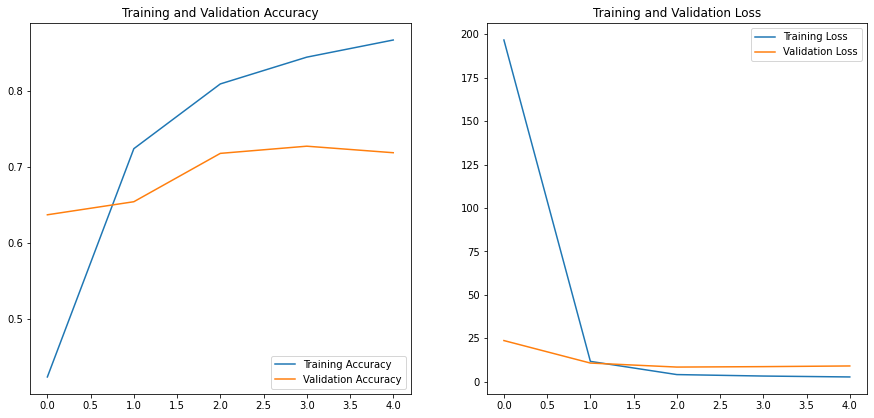

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#from keras.models import model_from_json

In [ ]:
# serialize model to JSON
#model_json = model.to_json()

In [ ]:
#with open("/content/drive/MyDrive/Foot images3/model_v3.json", "w") as json_file:
#    json_file.write(model_json)
#model.save_weights("/content/drive/MyDrive/Foot images3/model_v3.h5")
#print("Saved model to disk")
   